# Step1: data inspection through visualization
lets visualize the given dataset(s) - train, test and ideal data - finally a combination of train and test data in one chart

Loading training data...
Successfully loaded and sorted data/train.csv


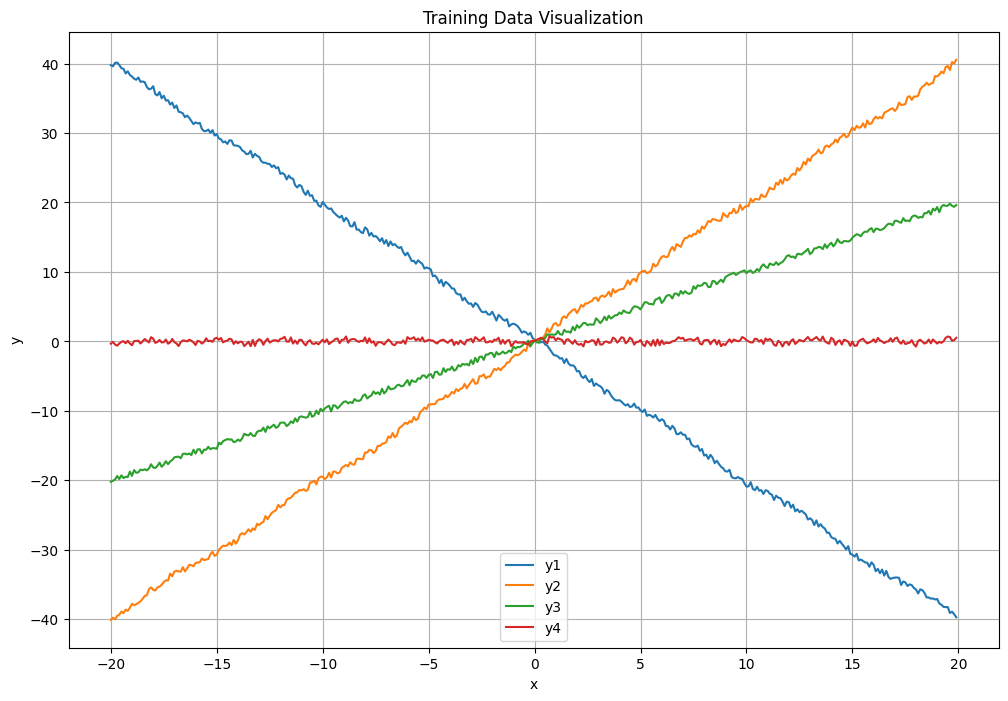

In [1]:
# data-inspection-visualization-1

import os
import matplotlib.pyplot as plt
from src.loader import DataTrainingLoader

# Load the training data using the DataTrainingLoader class
train_loader = DataTrainingLoader(os.path.join('data', 'train.csv'))
train_data = train_loader.load()

# Visualize the training data
def visualize_training_data(train_data):
    """
    Visualize the training data.
    
    :param train_data: DataFrame containing training data
    """
    x = train_data['x']
    y_columns = train_data.drop(columns=['x']).columns

    plt.figure(figsize=(12, 8))

    # Plot each y column in the training data as lines
    for y_col in y_columns:
        plt.plot(x, train_data[y_col], label=y_col)
    
    # Set the title and labels
    plt.title('Training Data Visualization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Call the visualization function
visualize_training_data(train_data)


Loading test data...
Successfully loaded and sorted data/test.csv


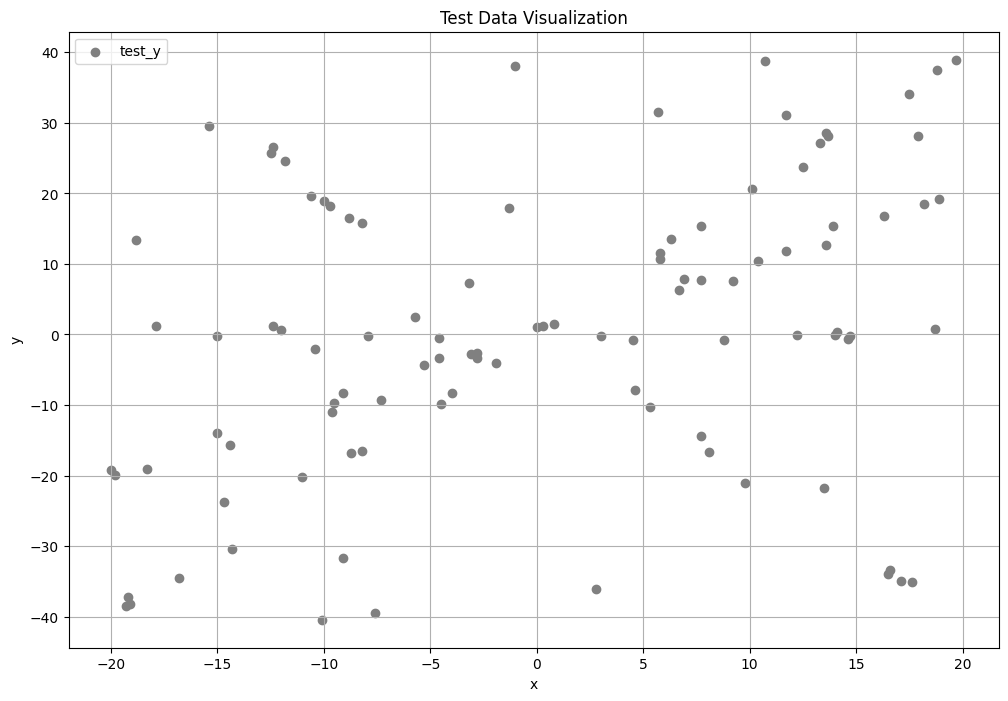

In [2]:
# data-inspection-visualization-2

import os
import matplotlib.pyplot as plt
from src.loader import DataTestLoader

# Load the test data using the DataTestLoader class
test_loader = DataTestLoader(os.path.join('data', 'test.csv'))
test_data = test_loader.load()

# Visualize the test data
def visualize_test_data(test_data):
    """
    Visualize the test data as a scatter plot.
    
    :param test_data: DataFrame containing test data
    """
    x = test_data['x']
    y = test_data['y']

    plt.figure(figsize=(12, 8))

    # Plot the y column in the test data as a scatter plot
    plt.scatter(x, y, label='test_y', marker='o', color='grey')
    
    # Set the title and labels
    plt.title('Test Data Visualization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Call the visualization function
visualize_test_data(test_data)


Loading ideal functions...
Successfully loaded and sorted data/ideal.csv


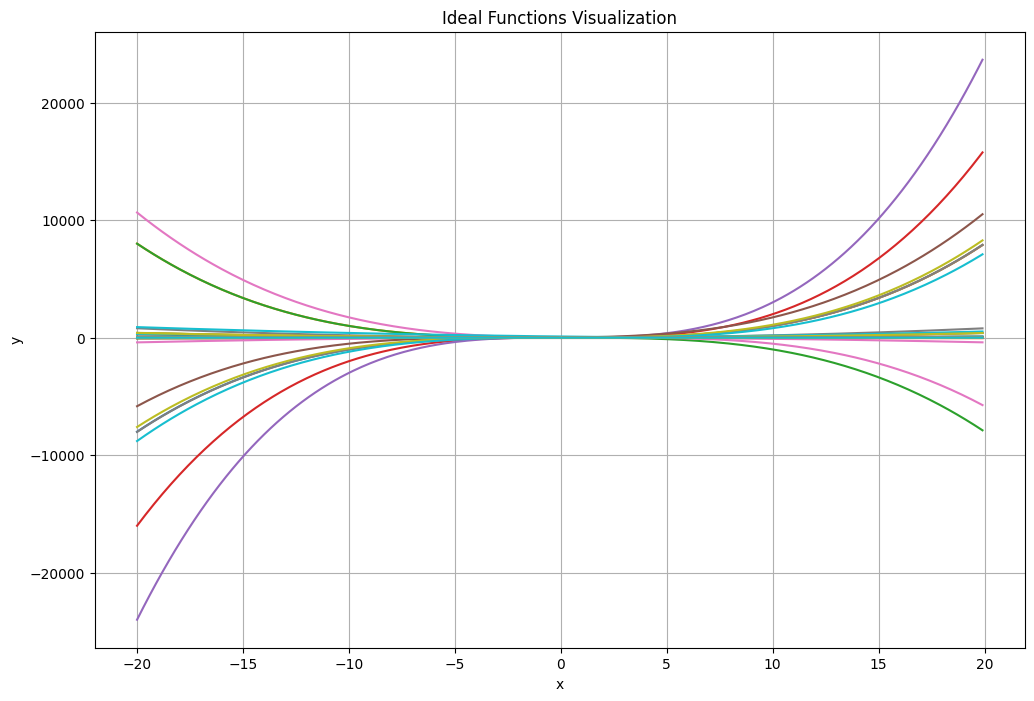

In [3]:
# data-inspection-visualization-3

import os
import matplotlib.pyplot as plt
from src.loader import DataIdealLoader

# Load the ideal functions data using the DataIdealLoader class
ideal_loader = DataIdealLoader(os.path.join('data', 'ideal.csv'))
ideal_functions = ideal_loader.load()

# Initialize enabled_values array with all 50 indices
enabled_values = list(range(1, 51))
# enabled_values = [42, 41, 11, 48]

# Visualize the ideal functions
def visualize_ideal_functions(ideal_functions, enabled_values):
    """
    Visualize the ideal functions based on enabled values.
    
    :param ideal_functions: DataFrame containing ideal functions
    :param enabled_values: list of integers representing the enabled y values
    """
    x = ideal_functions['x']
    y_columns = [f'y{i}' for i in enabled_values if f'y{i}' in ideal_functions.columns]

    plt.figure(figsize=(12, 8))

    # Plot each enabled y column in the ideal functions data
    for y_col in y_columns:
        plt.plot(x, ideal_functions[y_col], label=y_col)
    
    # Set the title and labels
    plt.title('Ideal Functions Visualization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Call the visualization function
visualize_ideal_functions(ideal_functions, enabled_values)


Loading training data...
Successfully loaded and sorted data/train.csv
Loading test data...
Successfully loaded and sorted data/test.csv


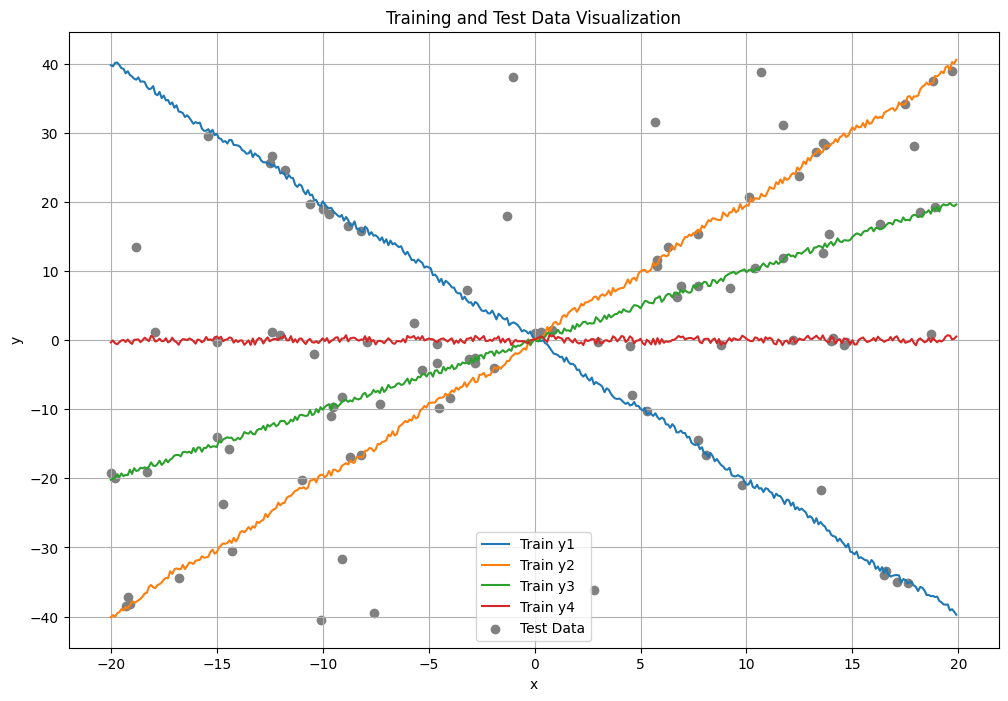

In [4]:
# data-inspection-visualization-4

import os
import matplotlib.pyplot as plt
from src.loader import DataTrainingLoader, DataTestLoader

# Load the training data using the DataTrainingLoader class
train_loader = DataTrainingLoader(os.path.join('data', 'train.csv'))
train_data = train_loader.load()

# Load the test data using the DataTestLoader class
test_loader = DataTestLoader(os.path.join('data', 'test.csv'))
test_data = test_loader.load()

# Visualize the training and test data together
def visualize_training_and_test_data(train_data, test_data):
    """
    Visualize the training and test data together in the same diagram.
    
    :param train_data: DataFrame containing training data
    :param test_data: DataFrame containing test data
    """
    x_train = train_data['x']
    y_train_columns = train_data.drop(columns=['x']).columns
    x_test = test_data['x']
    y_test = test_data['y']

    plt.figure(figsize=(12, 8))

    # Plot each y column in the training data as lines
    for y_col in y_train_columns:
        plt.plot(x_train, train_data[y_col], label=f'Train {y_col}')

    # Plot the test data as grey points
    plt.scatter(x_test, y_test, label='Test Data', color='grey')

    # Set the title and labels
    plt.title('Training and Test Data Visualization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the visualization function
visualize_training_and_test_data(train_data, test_data)


# Step2: execute the analysis
uses the DataLoaders to load the source data, pump it to SQLite, calculates least-square-fit to identify the best fitting ideal functions for the training data, finally evaluates the test data against these functions

In [5]:
# analysis-execution

# import relevant libraries and our functions from the src module
import os
from src.loader import DataTrainingLoader, DataTestLoader, DataIdealLoader
from src.database import TrainingDatabase
from src.analyzer import least_squares_fit, evaluate_test_data
from src.exceptions import DataLoadingError, DatabaseError, ModelFittingError, EvaluationError

# Load the source data from CSV
try:
    train_loader = DataTrainingLoader(os.path.join('data', 'train.csv'))
    train_data = train_loader.load()

    test_loader = DataTestLoader(os.path.join('data', 'test.csv'))
    test_data = test_loader.load()

    ideal_loader = DataIdealLoader(os.path.join('data', 'ideal.csv'))
    ideal_functions = ideal_loader.load()
except DataLoadingError as e:
    print(f"Error loading data: {e}")
    raise

# Create and populate the SQLite database
try:
    training_db = TrainingDatabase('database.db')
    training_db.create_and_populate_tables(train_data, test_data, ideal_functions)
except DatabaseError as e:
    print(f"Error creating or populating database: {e}")
    raise

# Fit the model and find the best fitting ideal functions
try:
    best_fit_indices = least_squares_fit(train_data, ideal_functions)
    print('Best fitting indices: ', best_fit_indices)
    for idx, fit_index in enumerate(best_fit_indices):
        print(f"🥳 Training data y{idx+1} fits best with ideal function y{fit_index}")
except ModelFittingError as e:
    print(f"Error in model fitting: {e}")
    raise

# Evaluate the test data against the best fitting ideal functions
try:
    results = evaluate_test_data(test_data, train_data, ideal_functions, best_fit_indices)
except EvaluationError as e:
    print(f"Error in evaluation: {e}")
    raise


Loading training data...
Successfully loaded and sorted data/train.csv
Loading test data...
Successfully loaded and sorted data/test.csv
Loading ideal functions...
Successfully loaded and sorted data/ideal.csv
Existing database at data/database.db removed.
New database created at data/database.db.
Table 'training_data' created in the database.
Table 'ideal_functions' created in the database.
Table 'test_data' created in the database.
Table 'results' created in the database.
Data inserted into table 'training_data'.
Data inserted into table 'ideal_functions'.
Data inserted into table 'test_data'.
Source data has been successfully inserted into the database.
Best fitting indices:  [42, 41, 11, 48]
🥳 Training data y1 fits best with ideal function y42
🥳 Training data y2 fits best with ideal function y41
🥳 Training data y3 fits best with ideal function y11
🥳 Training data y4 fits best with ideal function y48
Mapping results with deviations written to results/mapping-y1.csv
Mapping results w

# Step3: Visualize best fitting ideal functions mapping to training data

Loading training data...
Successfully loaded and sorted data/train.csv
Loading ideal functions...
Successfully loaded and sorted data/ideal.csv
Plot saved to results/training_and_ideal_data.png


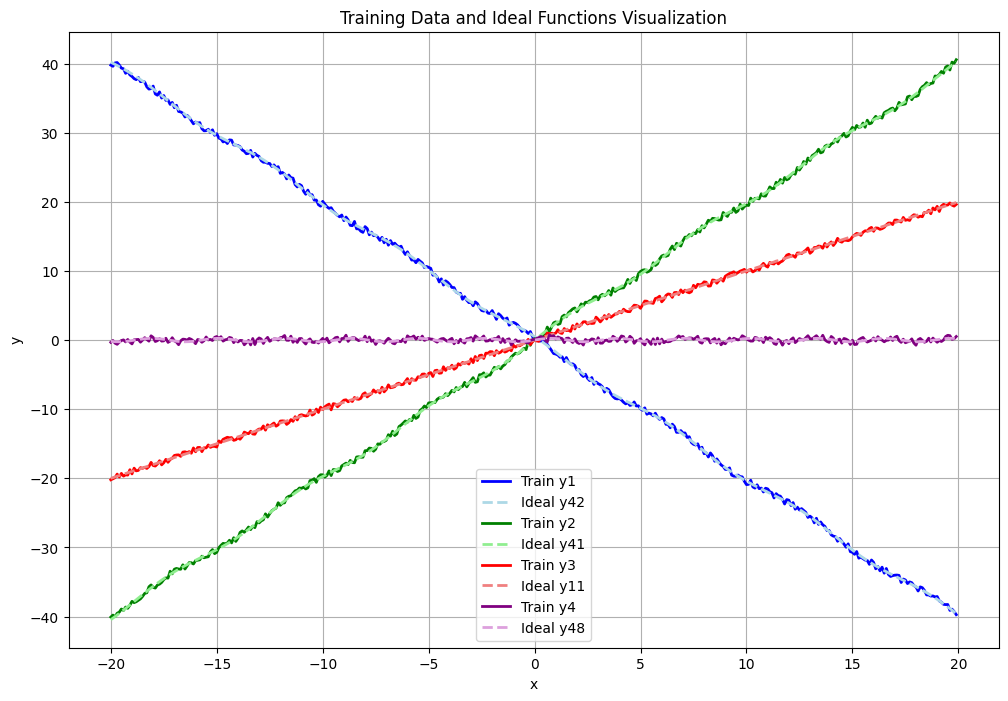

In [9]:
# result-visualization-1

import os
import matplotlib.pyplot as plt
from src.loader import DataTrainingLoader, DataIdealLoader

# Load the training data using the DataTrainingLoader class
train_loader = DataTrainingLoader(os.path.join('data', 'train.csv'))
train_data = train_loader.load()

# Load the ideal functions data using the DataIdealLoader class
ideal_loader = DataIdealLoader(os.path.join('data', 'ideal.csv'))
ideal_functions = ideal_loader.load()

# Visualize the training and ideal functions data together
def visualize_training_and_ideal_data(train_data, ideal_functions):
    """
    Visualize the training data against the corresponding ideal functions.
    
    :param train_data: DataFrame containing training data
    :param ideal_functions: DataFrame containing ideal functions
    """
    x_train = train_data['x']
    best_fit_indices = [42, 41, 11, 48]
    colors = ['blue', 'green', 'red', 'purple']
    pastel_colors = ['lightblue', 'lightgreen', 'lightcoral', 'plum']

    plt.figure(figsize=(12, 8))

    # Plot each y column in the training data and the corresponding ideal function
    for idx, y_col in enumerate(train_data.drop(columns=['x']).columns):
        plt.plot(x_train, train_data[y_col], label=f'Train {y_col}', color=colors[idx], linewidth=2)
        plt.plot(x_train, ideal_functions[f'y{best_fit_indices[idx]}'], label=f'Ideal y{best_fit_indices[idx]}', color=pastel_colors[idx], linestyle='--', linewidth=2)
    
    # Set the title and labels
    plt.title('Training Data and Ideal Functions Visualization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # Save the plot as an image file in the results directory
    if not os.path.exists('results'):
        os.makedirs('results')
    plot_file = os.path.join('results', 'training_and_ideal_data.png')
    plt.savefig(plot_file)
    print(f"Plot saved to {plot_file}")
    
    # Show the plot
    plt.show()

# Call the visualization function
visualize_training_and_ideal_data(train_data, ideal_functions)


# Step-4: Visualize the mapping of the ideal functions against the given Test data

Plot saved to results/mapping-y4.png


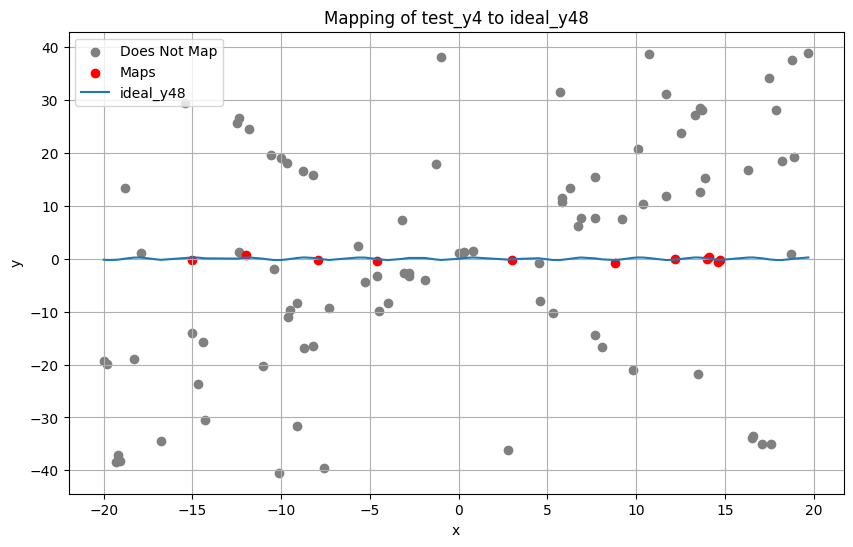

Plot saved to results/mapping-y1.png


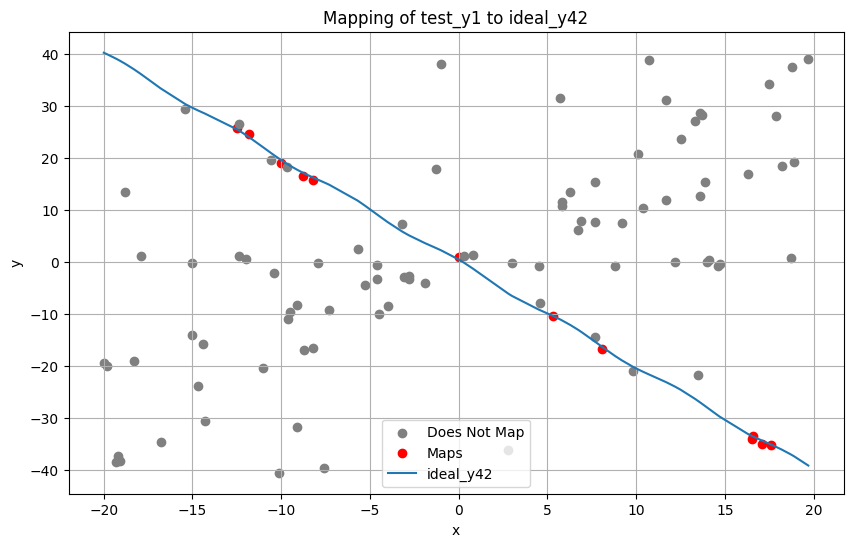

Plot saved to results/mapping-y3.png


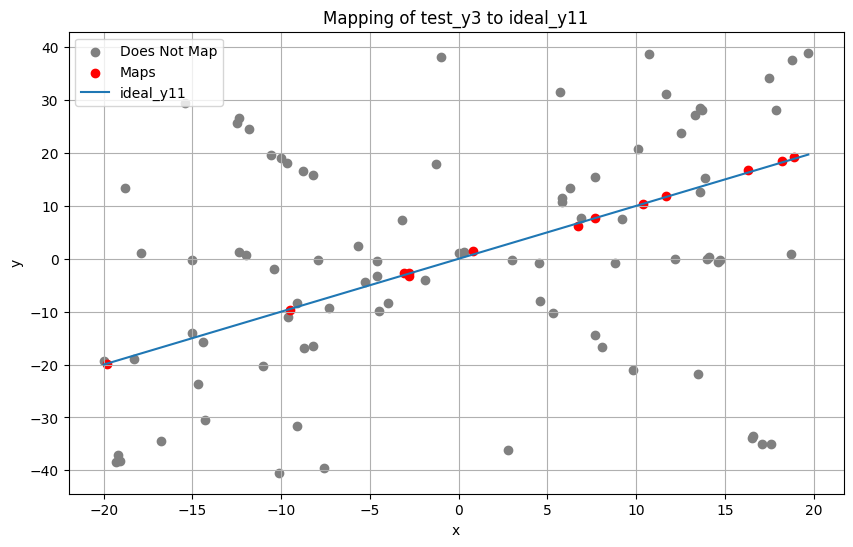

Plot saved to results/mapping-y2.png


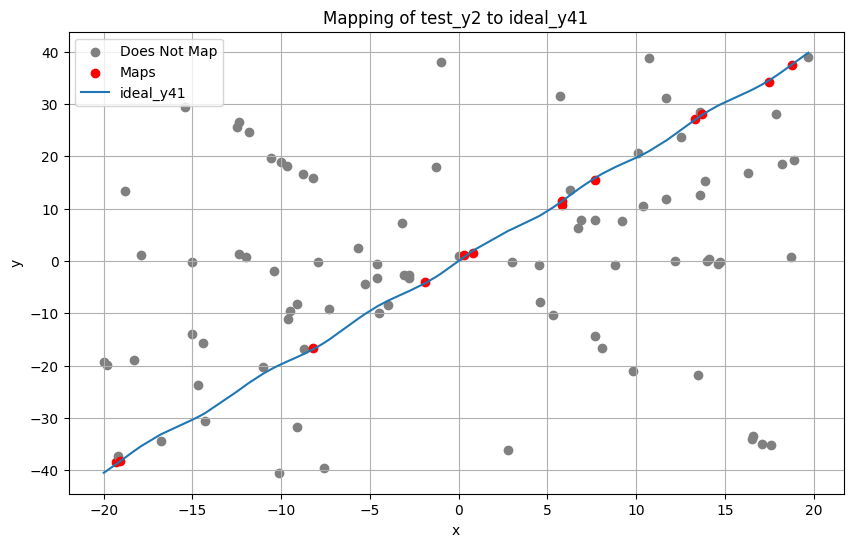

In [6]:
# result-visualization-2

import matplotlib.pyplot as plt
import pandas as pd
import os

def visualize_mappings(results_dir='results'):
    """
    Visualize the mappings from the CSV files in the results directory.
    
    :param results_dir: str, directory where the mapping CSV files are stored
    """
    # List all mapping CSV files in the results directory
    mapping_files = [f for f in os.listdir(results_dir) if f.startswith('mapping-y') and f.endswith('.csv')]
    
    for mapping_file in mapping_files:
        # Read the mapping CSV file
        df = pd.read_csv(os.path.join(results_dir, mapping_file))
        
        # Determine the test and ideal columns
        columns = df.columns
        x_column = columns[0]
        test_y_column = columns[1]
        ideal_y_column = columns[2]
        deviation_column = columns[3]
        maps_column = columns[4]
        
        # Create a new figure for each mapping
        plt.figure(figsize=(10, 6))
        
        # Plot the test y column as points, with color based on the maps column
        for _, row in df.iterrows():
            if row[maps_column]:
                plt.scatter(row[x_column], row[test_y_column], color='red', label='Maps' if 'Maps' not in plt.gca().get_legend_handles_labels()[1] else "")
            else:
                plt.scatter(row[x_column], row[test_y_column], color='grey', label='Does Not Map' if 'Does Not Map' not in plt.gca().get_legend_handles_labels()[1] else "")
        
        # Plot the ideal y column as a line
        plt.plot(df[x_column], df[ideal_y_column], label=ideal_y_column)
        
        # Set the title and labels
        plt.title(f'Mapping of {test_y_column} to {ideal_y_column}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        
        # Save the plot as an image file in the results directory
        plot_file = os.path.join(results_dir, f'{mapping_file[:-4]}.png')
        plt.savefig(plot_file)
        print(f"Plot saved to {plot_file}")
        
        # Show the plot
        plt.show()

# Call the visualization function
visualize_mappings()
